In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import api_function as ap
import plot_function as pf
from datetime import datetime
import datetime as dt
import time
import pandas_datareader as pdr

In [2]:
def manipulate(df):
    df.columns= df.columns.str.lower()
    df.columns= df.columns.str.replace(' ', '_')
    df['ratio'] = 100*(df.close - df.open)/df.open
    df['absolute'] = df.close - df.open
    df.index = pd.to_datetime(df.index)
    df['avg_ratio'] = df.ratio.mean()
    df = df.reset_index()
    df = df.rename(columns={'Date':'timestamp'})
    df = df.set_index('timestamp')
    return df

In [3]:
# r_aapl = ap.get_stock_daily('AAPL', 'full', 'csv')
# with open('data/apple-daily.csv', 'wb') as f:
#     f.write(r_aapl.content)

In [4]:
# df_tesla = pd.read_csv('data/tesla-daily.csv')
# df_tesla.head()

In [5]:
df_apple = manipulate(pdr.get_data_yahoo('AAPL', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))
df_bitcoin = manipulate(pdr.get_data_yahoo('BTC-USD', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))

In [6]:
df_bitcoin.head()

,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
timestamp,,,,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,-1.831006,-8.529999,0.240907
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,-7.096262,-32.419983,0.240907
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,-6.910351,-29.307007,0.240907
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,3.605767,14.230988,0.240907
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,-2.270110,-9.263977,0.240907


In [7]:

df_tesla = manipulate(pdr.get_data_yahoo('TSLA', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))
df_microsoft = manipulate(pdr.get_data_yahoo('MSFT', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))
df_google = manipulate(pdr.get_data_yahoo('GOOG', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))
df_facebook = manipulate(pdr.get_data_yahoo('FB', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31)))

In [8]:
# df_bitcoin.to_csv('data/BTC-Daily.csv')
# df_apple.to_csv('data/AAPL-Daily.csv')
# df_tesla.to_csv('data/TSLA-Daily.csv')
# df_microsoft.to_csv('data/MSFT-Daily.csv')
# df_google.to_csv('data/GOOG-Daily.csv')
# df_facebook.to_csv('data/FB-Daily.csv')


In [9]:
df_google.head()

,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
timestamp,,,,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585,1.909818,6.211700,0.034836
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242,0.488698,1.618927,0.034836
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536,-0.471214,-1.554199,0.034836
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326,-1.385123,-4.547974,0.034836
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780,-3.718488,-11.975128,0.034836


In [10]:
df_stocks_close = pd.concat([df_apple['close'], df_bitcoin['close'], df_tesla['close'], df_microsoft['close'], df_google['close'], df_facebook['close']], axis=1)
df_stocks_close.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [11]:
df_stocks_ratio = pd.concat([df_apple['ratio'], df_bitcoin['ratio'], df_tesla['ratio'], df_microsoft['ratio'], df_google['ratio'], df_facebook['ratio']], axis=1)
df_stocks_ratio.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [12]:
df_stocks_close.head()

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2012-01-03,14.686786,NaN,5.616,26.770000,331.462585,NaN
2012-01-04,14.765714,NaN,5.542,27.400000,332.892242,NaN
2012-01-05,14.929643,NaN,5.424,27.680000,328.274536,NaN
2012-01-06,15.085714,NaN,5.382,28.110001,323.796326,NaN
2012-01-09,15.061786,NaN,5.450,27.740000,310.067780,NaN


In [13]:
df_apple[df_apple.timestamp.dt.year == 2010][5:]

AttributeError: 'DataFrame' object has no attribute 'timestamp'

In [ ]:
df_stocks_close[df_stocks_close.index.year == 2010][0:10]

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2010-01-04,214.01,NaN,NaN,30.950,NaN,NaN
2010-01-05,214.38,NaN,NaN,30.960,NaN,NaN
2010-01-06,210.97,NaN,NaN,30.770,NaN,NaN
2010-01-07,210.58,NaN,NaN,30.452,NaN,NaN
2010-01-08,211.98,NaN,NaN,30.660,NaN,NaN
2010-01-11,210.11,NaN,NaN,30.270,NaN,NaN
2010-01-12,207.72,NaN,NaN,30.070,NaN,NaN
2010-01-13,210.65,NaN,NaN,30.350,NaN,NaN
2010-01-14,209.43,NaN,NaN,30.960,NaN,NaN


In [ ]:
df_stocks_ratio_normed.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,1999-11-01,1.000000,NaN,NaN,1.000000,NaN,NaN
1,1999-11-02,-0.969619,NaN,NaN,0.217073,NaN,NaN
2,1999-11-03,0.049419,NaN,NaN,1.071745,NaN,NaN
3,1999-11-04,-0.639008,NaN,NaN,0.642844,NaN,NaN
4,1999-11-05,-1.465772,NaN,NaN,0.288547,NaN,NaN


In [ ]:
df_tesla.head()

,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
timestamp,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,-2.971664,-0.172,0.063507
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,-1.772428,-0.100,0.063507
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,-2.305480,-0.128,0.063507
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,-1.066178,-0.058,0.063507
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,0.925921,0.050,0.063507


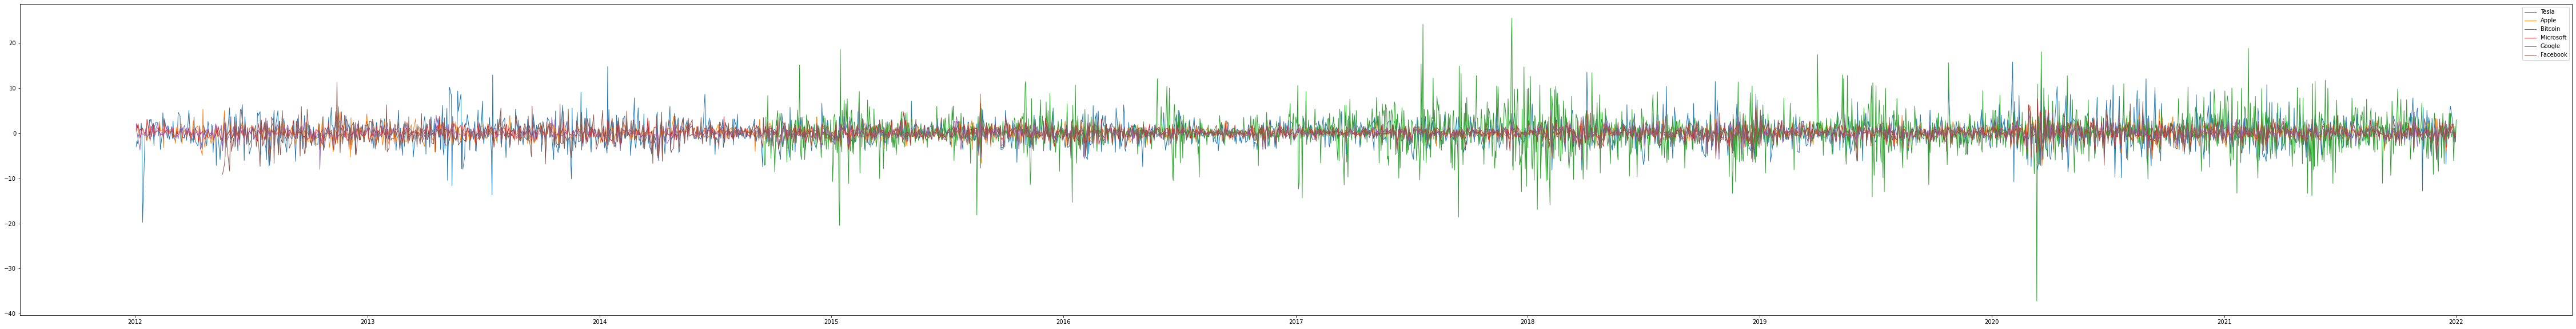

In [ ]:
plt.figure(figsize=(80,10))
plt.plot(df_tesla.index, df_tesla.ratio, lw=1)
plt.plot(df_apple.index, df_apple.ratio, lw=1)
plt.plot(df_bitcoin.index, df_bitcoin.ratio, lw=1)
plt.plot(df_microsoft.index, df_microsoft.ratio, lw=1)
plt.plot(df_google.index, df_google.ratio, lw=1)
plt.plot(df_facebook.index, df_facebook.ratio, lw=1)
plt.legend(['Tesla', 'Apple', 'Bitcoin', 'Microsoft', 'Google', 'Facebook'])
plt.show()


In [ ]:
df_stocks_ratio

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2012-01-03,0.446990,NaN,-2.971664,0.828630,1.909818,NaN
2012-01-04,0.839024,NaN,-1.772428,2.162565,0.488698,NaN
2012-01-05,0.742256,NaN,-2.305480,1.095694,-0.471214,NaN
2012-01-06,0.626532,NaN,-1.066178,2.106792,-1.385123,NaN
2012-01-09,-0.886021,NaN,0.925921,-1.105167,-3.718488,NaN
...,...,...,...,...,...,...
2021-12-28,-0.482910,-6.099078,-1.894566,-0.553692,-1.298405,-0.118283
2021-12-29,0.027883,-2.475986,-1.133226,0.190455,0.051219,-1.144389
2021-12-30,-0.707642,1.478835,0.848936,-0.757508,-0.305563,0.104647


In [ ]:
#df_stocks_ratio['bitcoin'].isna()==False

2012-01-01    True
2012-01-02    True
2012-01-03    True
2012-01-04    True
2012-01-05    True
              ... 
2021-12-27    True
2021-12-28    True
2021-12-29    True
2021-12-30    True
2021-12-31    True
Freq: D, Name: bitcoin, Length: 3653, dtype: bool

In [ ]:
df_stocks_ratio_normed = df_stocks_ratio
df_stocks_close_normed = df_stocks_close

In [ ]:
#df_stocks_ratio_normed = df_stocks_ratio_normed.rename(columns= {'':'timestamp'})

In [ ]:
df_stocks_ratio_normed['microsoft'] = df_stocks_ratio['microsoft']/df_stocks_ratio['microsoft'][df_stocks_ratio['microsoft'].first_valid_index()]
df_stocks_ratio_normed['apple'] = df_stocks_ratio['apple']/df_stocks_ratio['apple'][df_stocks_ratio['apple'].first_valid_index()]
df_stocks_ratio_normed['bitcoin'] = df_stocks_ratio['bitcoin']/df_stocks_ratio['bitcoin'][df_stocks_ratio['bitcoin'].first_valid_index()]
df_stocks_ratio_normed['tesla'] = df_stocks_ratio['tesla']/df_stocks_ratio['tesla'][df_stocks_ratio['tesla'].first_valid_index()]
df_stocks_ratio_normed['google'] = df_stocks_ratio['google']/df_stocks_ratio['google'][df_stocks_ratio['google'].first_valid_index()]
df_stocks_ratio_normed['facebook'] = df_stocks_ratio['facebook']/df_stocks_ratio['facebook'][df_stocks_ratio['facebook'].first_valid_index()]


In [ ]:
df_stocks_ratio_normed.head(50)

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2012-01-03,1.000000,NaN,1.000000,1.000000,1.000000,NaN
2012-01-04,1.877055,NaN,0.596443,2.609808,0.255887,NaN
2012-01-05,1.660566,NaN,0.775821,1.322297,-0.246732,NaN
2012-01-06,1.401671,NaN,0.358781,2.542501,-0.725265,NaN
2012-01-09,-1.982196,NaN,-0.311583,-1.333729,-1.947038,NaN
2012-01-10,-1.402475,NaN,-0.220745,-0.388877,-0.549594,NaN
2012-01-11,-0.068802,NaN,-0.743200,1.275881,0.206588,NaN
2012-01-12,-0.471515,NaN,0.271762,0.562915,-0.131064,NaN
2012-01-13,0.058615,NaN,6.647291,1.382668,-0.106184,NaN


In [ ]:
df_ratio_semimonth = df_stocks_ratio_normed.reset_index()

In [ ]:
df_ratio_semimonth = df_ratio_semimonth.rename(columns={'Date':'timestamp'})
df_ratio_semimonth.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,2012-01-03,1.000000,NaN,1.000000,1.000000,1.000000,NaN
1,2012-01-04,1.877055,NaN,0.596443,2.609808,0.255887,NaN
2,2012-01-05,1.660566,NaN,0.775821,1.322297,-0.246732,NaN
3,2012-01-06,1.401671,NaN,0.358781,2.542501,-0.725265,NaN
4,2012-01-09,-1.982196,NaN,-0.311583,-1.333729,-1.947038,NaN


In [ ]:
df_ratio_semimonth = df_ratio_semimonth.groupby([pd.Grouper(key='timestamp', freq='SM')])[['tesla', 'apple', 'bitcoin', 'microsoft', 'google', 'facebook']].mean().reset_index().sort_values('timestamp')
print(df_ratio_semimonth)

     timestamp     tesla     apple   bitcoin  microsoft    google  facebook
0   2011-12-31  0.930508  0.230324       NaN   0.997052 -0.249267       NaN
1   2012-01-15 -0.314472 -0.412689       NaN   0.617260 -0.107070       NaN
2   2012-01-31 -0.256766  1.629285       NaN   0.254931  0.089347       NaN
3   2012-02-15 -0.219528  0.836994       NaN   0.682969  0.143962       NaN
4   2012-02-29 -0.108507  0.714890       NaN   0.191287 -0.060339       NaN
..         ...       ...       ...       ...        ...       ...       ...
236 2021-10-31  0.065776 -0.111762 -0.233461   0.031101 -0.087350 -0.004119
237 2021-11-15 -0.308020  1.338764  0.596236   0.024012 -0.132242  0.016248
238 2021-11-30  0.518091  1.188028  0.744855  -0.467762 -0.160383  0.043298
239 2021-12-15 -0.271786  0.673239  0.080791   0.412518  0.133005 -0.044873
240 2021-12-31  0.522270 -0.653217 -0.311231  -0.780751 -0.311009  0.214046

[241 rows x 7 columns]


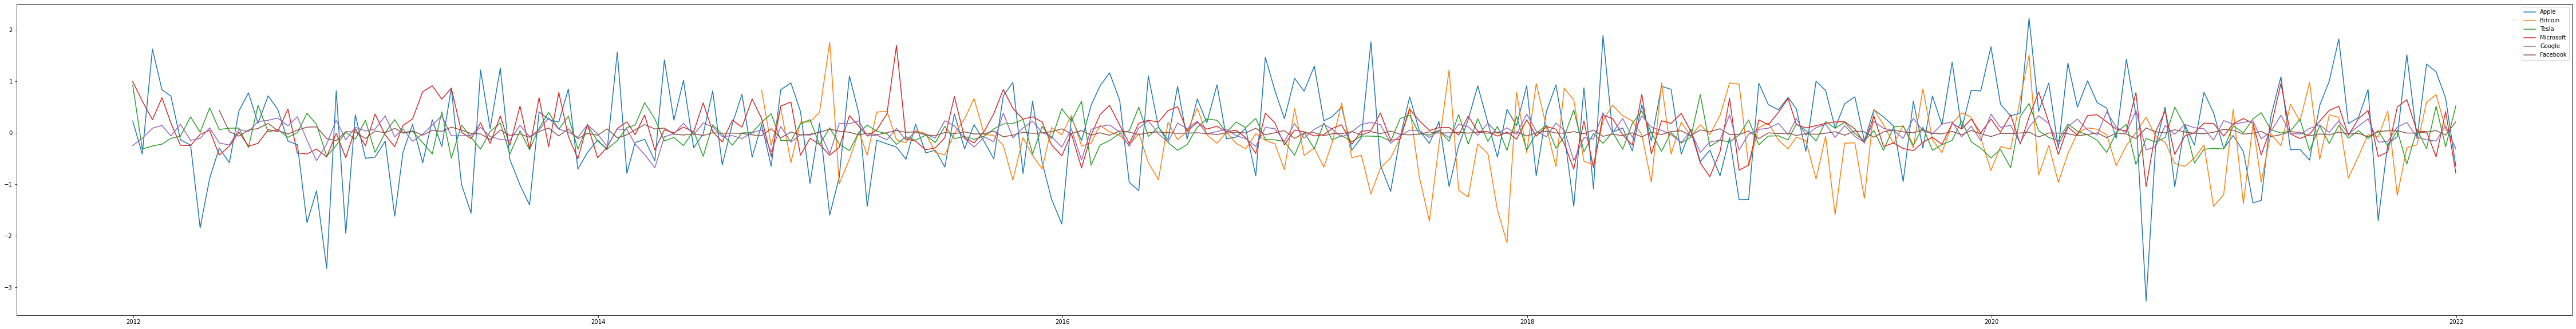

In [ ]:
plt.figure(figsize=(80,10))

plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.apple)
plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.bitcoin)
plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.tesla)
plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.microsoft)
plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.google)
plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.facebook)
plt.legend(['Apple','Bitcoin', 'Tesla', 'Microsoft', 'Google', 'Facebook'])
plt.show()

In [ ]:
df_stocks_close_normed['microsoft'] = df_stocks_close_normed['microsoft']/df_stocks_close_normed['microsoft'][df_stocks_close_normed['microsoft'].first_valid_index()]
df_stocks_close_normed['apple'] = df_stocks_close_normed['apple']/df_stocks_close_normed['apple'][df_stocks_close_normed['apple'].first_valid_index()]
df_stocks_close_normed['bitcoin'] = df_stocks_close_normed['bitcoin']/df_stocks_close_normed['bitcoin'][df_stocks_close_normed['bitcoin'].first_valid_index()]
df_stocks_close_normed['tesla'] = df_stocks_close_normed['tesla']/df_stocks_close_normed['tesla'][df_stocks_close_normed['tesla'].first_valid_index()]
df_stocks_close_normed['google'] = df_stocks_close_normed['google']/df_stocks_close_normed['google'][df_stocks_close_normed['google'].first_valid_index()]
df_stocks_close_normed['facebook'] = df_stocks_close_normed['facebook']/df_stocks_close_normed['facebook'][df_stocks_close_normed['facebook'].first_valid_index()]

In [ ]:
df_stocks_close_normed_y = df_stocks_close_normed[df_stocks_close_normed.index.weekday.isin([0,1,2,3,4])].reset_index()
df_stocks_close_normed_y_woBTC = df_stocks_close_normed_y.drop(columns= {'bitcoin', 'tesla'})

In [ ]:
df_stocks_close_normed_y.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,2012-01-03,1.000000,NaN,1.000000,1.000000,1.000000,NaN
1,2012-01-04,1.005374,NaN,0.986823,1.023534,1.004313,NaN
2,2012-01-05,1.016536,NaN,0.965812,1.033993,0.990382,NaN
3,2012-01-06,1.027162,NaN,0.958333,1.050056,0.976871,NaN
4,2012-01-09,1.025533,NaN,0.970442,1.036235,0.935453,NaN


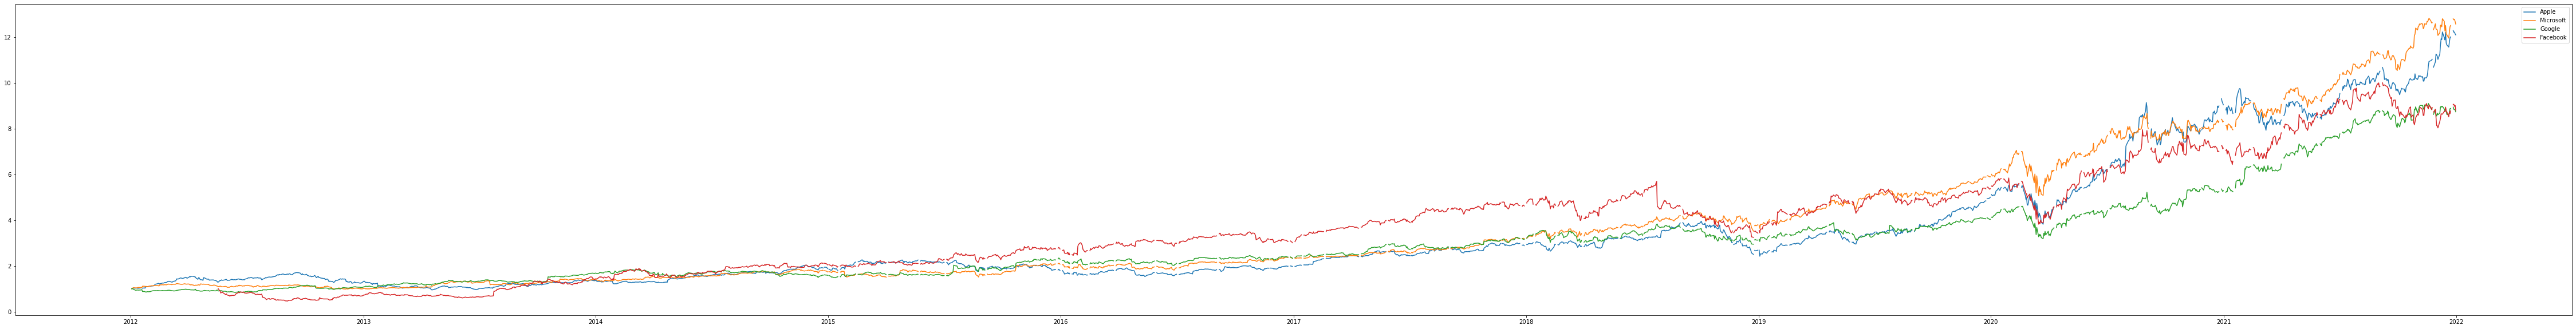

In [ ]:
plt.figure(figsize=(80,10))

plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.apple)
plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.bitcoin)
plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.tesla)
plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.microsoft)
plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.google)
plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.facebook)
plt.legend(['Apple', 'Microsoft', 'Google', 'Facebook'])



In [ ]:
df_stocks_close_normed_y_woBTC.head()

,timestamp,apple,microsoft,google,facebook
0,2012-01-03,1.000000,1.000000,1.000000,NaN
1,2012-01-04,1.005374,1.023534,1.004313,NaN
2,2012-01-05,1.016536,1.033993,0.990382,NaN
3,2012-01-06,1.027162,1.050056,0.976871,NaN
4,2012-01-09,1.025533,1.036235,0.935453,NaN


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [ ]:
# app = Dash('Stockvalues closed, without BTC')

# app.layout = html.Div([
#     html.H4('Stockvalues closed, without BTC'),
#     dcc.Graph(id="graph"),
#     dcc.Checklist(
#         id="checklist",
#         options=[2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
#         value=[2020, 2021],
#         inline=True
#     ),
# ])


# @app.callback(
#     Output("graph", "figure"), 
#     Input("checklist", "value"))
# def update_line_chart(continents):
#     df = px.df_stocks_close_normed_y_woBTC # replace with your own data source
#     mask = df.index.isin(options)
#     fig = px.line(df[mask], 
#         x="year", y="Value")
#     return fig


#app.run_server(debug=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker_color='lightsalmon'
))

In [ ]:
df_stocks_close_normed.head()

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2012-01-03,1.000000,NaN,1.000000,1.000000,1.000000,NaN
2012-01-04,1.005374,NaN,0.986823,1.023534,1.004313,NaN
2012-01-05,1.016536,NaN,0.965812,1.033993,0.990382,NaN
2012-01-06,1.027162,NaN,0.958333,1.050056,0.976871,NaN
2012-01-09,1.025533,NaN,0.970442,1.036235,0.935453,NaN


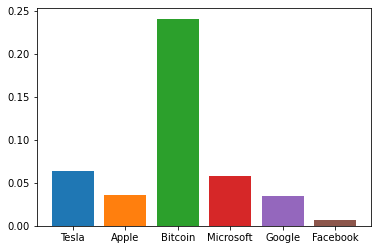

In [ ]:
plt.bar('Tesla', df_tesla.avg_ratio[1])
plt.bar('Apple', df_apple.avg_ratio[1])
plt.bar('Bitcoin', df_bitcoin.avg_ratio[1])
plt.bar('Microsoft', df_microsoft.avg_ratio[1])
plt.bar('Google', df_google.avg_ratio[1])
plt.bar('Facebook', df_facebook.avg_ratio[1])
plt.show()

In [ ]:
df_bitcoin.head()

,timestamp,open,high,low,close,volume,ratio,absolute,avg_ratio
0,2022-03-21,41265.2659,41548.3907,40506.5318,41006.9671,48166,-0.625947,-258.2988,0.234066
1,2022-03-20,42208.2299,42303.0066,40914.4532,41267.8547,38469,-2.227943,-940.3752,0.234066
2,2022-03-19,41764.4144,42407.3007,41504.8632,42209.0166,39308,1.064548,444.6022,0.234066
3,2022-03-18,40928.0314,42348.2912,40137.4168,41764.1391,52652,2.042873,836.1077,0.234066
4,2022-03-17,41119.5832,41450.5255,40509.1084,40928.8143,53008,-0.463937,-190.7689,0.234066


In [ ]:
import plotly.graph_objects as go
from datetime import datetime


In [ ]:
# import plotly.io as pio
# pio.renderers.default = 'iframe_connected'

In [ ]:

fig = go.Figure(data=[go.Candlestick(x=df_tesla.index,
                open=df_tesla.open,
                high=df_tesla.high,
                low=df_tesla.low,
                close=df_tesla.close)])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
#pf.plot_candlestick(df_tesla)

In [15]:
def revenue(df, start, end, invest):
    if (invest/(df.open.loc[df.index == start])[0]) <= (df.volume.loc[df.index == start])[0]:
        profit = (df.close.loc[df.index == end])[0] / (df.close.loc[df.index == start])[0]
        profit *= (invest/(df.open.loc[df.index == start])[0])
        return profit
    else: print('That many Stocks are not available')

In [16]:
(df_apple.volume.loc[df_apple.index == '2015-03-11'])[0]

275756000.0

In [17]:
def revenue_ratio(df, start, end):
    profit = (df.close.loc[df.index == end])[0] / (df.close.loc[df.index == start])[0]
    return profit
    

In [18]:
revenue_ratio(df_tesla, '2015-03-10', '2015-03-11')

1.0179697860817063

In [19]:
revenue(df_tesla, '2021-03-10', '2021-03-18', 850)

1.1866944242736253

In [ ]:
type(hist)